<a href="https://colab.research.google.com/github/rishabhdeepsingh/tensorflow/blob/main/05/ConvolutionalNeuralNetwork/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [5]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Number of classes
K = len(set(y_train))
print("# classes: ", K)

# classes:  10


In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# compile and fit
# Note: Make sure to use GPU for this!!!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5380 - accuracy: 0.7996 - val_loss: 0.4107 - val_accuracy: 0.8467
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3726 - accuracy: 0.8604 - val_loss: 0.3515 - val_accuracy: 0.8694
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3194 - accuracy: 0.8802 - val_loss: 0.3240 - val_accuracy: 0.8811
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2860 - accuracy: 0.8910 - val_loss: 0.3146 - val_accuracy: 0.8873
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2602 - accuracy: 0.9012 - val_loss: 0.2958 - val_accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2385 - accuracy: 0.9100 - val_loss: 0.2998 - val_accuracy: 0.8913
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9163 - val_loss: 0.2843 - val_accuracy

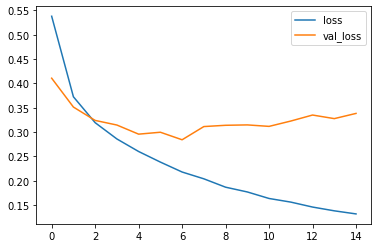

In [10]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

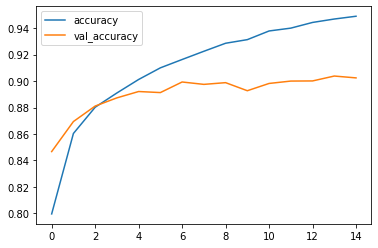

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[831   1  21  15   4   2 119   0   7   0]
 [  2 978   1  14   1   0   3   0   1   0]
 [ 17   1 855   9  42   0  73   0   3   0]
 [  3   7  16 927  20   1  26   0   0   0]
 [  2   0  55  27 825   0  89   0   2   0]
 [  0   0   0   2   0 964   0  24   1   9]
 [ 76   0  57  34  72   0 750   0  11   0]
 [  0   0   0   0   0   7   0 951   0  42]
 [  1   0   5   5   4   1   7   1 973   3]
 [  1   0   0   0   0   5   0  24   0 970]]


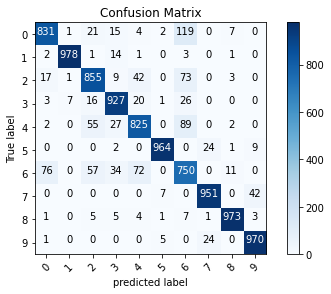

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion Matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalizaion can be applied by setting `normalize=True`
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [16]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankel boot'''.split()

Text(0.5, 1.0, 'True Label: Shirt\n Predicted: Coat')

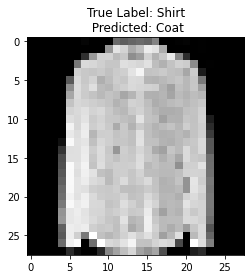

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True Label: %s\n Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))